# Main Supervisor 

In [9]:
import sys
sys.path.append('../')

######### React agent ############
from langgraph.prebuilt import create_react_agent
from langgraph.checkpoint.memory import InMemorySaver

###### From config #######
from config import Config
conf = Config()

import pandas as pd

from agents.news_agent import news_agent
from agents.central_memory_agent import central_memory_agent

In [4]:
from langgraph_supervisor import create_supervisor

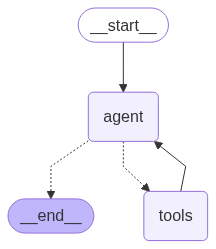

In [5]:
news_agent

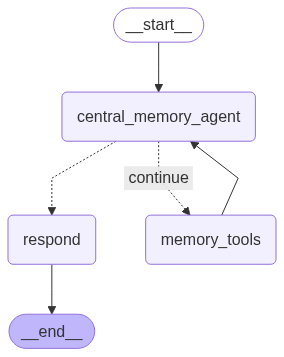

In [6]:
central_memory_agent

# Supervisor 

## Prompt (Build Using Langchain)

In [39]:
long_term_memory = pd.read_csv(f"{conf.memory_path}/Permanent_Memory.csv")
reminders = pd.read_csv(f"{conf.memory_path}/Reminders.csv")

In [40]:
long_term_memory_str = long_term_memory.to_json(orient='records', indent=4)
print(long_term_memory_str)

print("\n\n")
reminders = reminders.to_json(orient='records', indent=4)
print(reminders)


[
    {
        "date_logged":"2025-06-23 02:03:09.720013",
        "remember_window":"9999-12-31 23:59:59.999999",
        "remember_flag":"Permanent",
        "AImessage":"I will remember that your name is Siddharth permanently.",
        "context":"My Name is Siddharth"
    }
]



[
    {
        "date_logged":"2025-06-23 02:02:54",
        "remember_window":"2025-12-01",
        "remember_flag":"Not Permanent",
        "AImessage":"I will remind you to finish things before the beginning of December 2025.",
        "context":"Remind me to finish things before July"
    }
]


In [ ]:
from langchain_core.prompts import PromptTemplate

prompt_template = PromptTemplate.from_template("You are Ryo, health and lifestyle supervisor managing a Central Memory Agent and a News Agent. You will be also provided with Past Interaction asked by the user store permanently and as reminders.\n" 
                                "<Agent Insturctions>\n"
                                "1. For news related queries use News Agent.\n"
                                "2. For storing memories and reminders, use Central Memory Agent. \n{topic}")
print(prompt_template.invoke({"topic": "cats"}).to_string())

You are Ryo, health and lifestyle supervisor managing a Central Memory Agent and a News Agent.
<Agent Insturctions>
1. For news related queries use News Agent.
2. For storing memories and reminders, use Central Memory Agent. 
cats


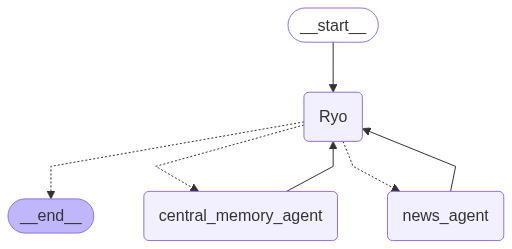

In [7]:
graph = create_supervisor([news_agent, central_memory_agent], 
                        model=conf.model, 
                        supervisor_name='Ryo',
                        prompt=("You are Ryo, health and lifestyle supervisor managing a Central Memory Agent and a News Agent." 
                                "For news related queries use News Agent. "
                                "For storing memories and reminders, use Central Memory Agent.")
                        
    
    
)
ryo = graph.compile(checkpointer=InMemorySaver())
ryo



In [8]:
ryo.invoke(
    {"messages": [{"role": "user", "content": "What is the latest news? Give me some headlines for this week in United States on - Politics, Sports, Technology, AI. Also provide some context on each of these headlines"}]},
    conf.ryo_configs
)


{'messages': [HumanMessage(content='What is the latest news? Give me some headlines for this week in United States on - Politics, Sports, Technology, AI. Also provide some context on each of these headlines', additional_kwargs={}, response_metadata={}, id='aa1b5788-6911-4aa6-980b-d0827ec9387a'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_4R8GMDUTiWhqSciETZxisOIH', 'function': {'arguments': '{}', 'name': 'transfer_to_news_agent'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 136, 'total_tokens': 148, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_07871e2ad8', 'id': 'chatcmpl-BlTV88vW4ZMPP5NWAGT4h2RnxtwHL', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs

In [9]:
result = ryo.invoke(
    {"messages": [{"role": "user", "content": "Remember my name is Siddharth"}]},
    conf.ryo_configs
)

result

{'messages': [HumanMessage(content='What is the latest news? Give me some headlines for this week in United States on - Politics, Sports, Technology, AI. Also provide some context on each of these headlines', additional_kwargs={}, response_metadata={}, id='aa1b5788-6911-4aa6-980b-d0827ec9387a'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_4R8GMDUTiWhqSciETZxisOIH', 'function': {'arguments': '{}', 'name': 'transfer_to_news_agent'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 136, 'total_tokens': 148, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_07871e2ad8', 'id': 'chatcmpl-BlTV88vW4ZMPP5NWAGT4h2RnxtwHL', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs

In [10]:
ryo.invoke(
    {"messages": [{"role": "user", "content": "What did I ask just now?"}]},
    conf.ryo_configs
)

{'messages': [HumanMessage(content='What is the latest news? Give me some headlines for this week in United States on - Politics, Sports, Technology, AI. Also provide some context on each of these headlines', additional_kwargs={}, response_metadata={}, id='aa1b5788-6911-4aa6-980b-d0827ec9387a'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_4R8GMDUTiWhqSciETZxisOIH', 'function': {'arguments': '{}', 'name': 'transfer_to_news_agent'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 136, 'total_tokens': 148, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_07871e2ad8', 'id': 'chatcmpl-BlTV88vW4ZMPP5NWAGT4h2RnxtwHL', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs